<a href="https://colab.research.google.com/github/tanboi85/ml_python/blob/main/knn_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Information

5. Number of Instances: 1728
   (instances completely cover the attribute space)

6. Number of Attributes: 6

7. Attribute Values:

   buying       v-high, high, med, low
   maint        v-high, high, med, low
   doors        2, 3, 4, 5-more
   persons      2, 4, more
   lug_boot     small, med, big
   safety       low, med, high

8. Missing Attribute Values: none

9. Class Distribution (number of instances per class)

   class      N          N
   -----------------------------
   unacc     1210     (70.023 %) 
   acc        384     (22.222 %) 
   good        69     ( 3.993 %) 
   v-good      65     ( 3.762 %) 


Question 1: Do any preprocessing to data as necessary. Then, answer the following questions:
What are the types of the attributes?
Is there any empty or null values? What approach you use to address them (remove,
replace, etc.)? and why?
Any unused or irrelevant columns/attributes? What do you do to them?
What attribute(s) might be useful?


Question 2:
Experiment with KNN machine learning algorithm to predict your Class label based on your
selected data. Use default KNN configurations and try at least two different values of k. Try
conduct also with custom KNN configurations with at least 5 fold cross-validation. Compare the
two KNN and specify your findings. Do higher values of k lead to better performance? Do crossvalidation effect KNN performance?


In [1]:
# Import important libarery 

import pandas as pd
import numpy as np

# import dataset and add columm names to the imporated dataset

colName = ['buying','maintenance','doors','persons','luggage boot','safety','class']
data = pd.read_csv('car.data', names = colName)

# Show the the tope 5 obersrvation of the dataset
data.head(5)

,buying,maintenance,doors,persons,luggage boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
# show data description 
data.describe()

,buying,maintenance,doors,persons,luggage boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [3]:
# show data type of all the attributes
data.dtypes

buying          object
maintenance     object
doors           object
persons         object
luggage boot    object
safety          object
class           object
dtype: object

- Data description and data type funcations shows that all the attributes are categorical

In [4]:
#show the number of attributes and observationsdata.shape
data.shape

(1728, 7)

In [5]:
# count class lables
col_attribute = ['buying','maintenance','doors','persons','luggage boot','safety','class']
for i in col_attribute:
    print('Attribute name:',i)
    print('-------------------')
    print(data[i].value_counts())
    print('-------------------')


Attribute name: buying
-------------------
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
-------------------
Attribute name: maintenance
-------------------
vhigh    432
high     432
med      432
low      432
Name: maintenance, dtype: int64
-------------------
Attribute name: doors
-------------------
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
-------------------
Attribute name: persons
-------------------
2       576
4       576
more    576
Name: persons, dtype: int64
-------------------
Attribute name: luggage boot
-------------------
small    576
med      576
big      576
Name: luggage boot, dtype: int64
-------------------
Attribute name: safety
-------------------
low     576
med     576
high    576
Name: safety, dtype: int64
-------------------
Attribute name: class
-------------------
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64
-------------------


In [6]:
#select feature columns from dataset
null_data = data.iloc[:,:-1]

# find null vule for all attributes and sum totall number
null_data.isnull().sum()

buying          0
maintenance     0
doors           0
persons         0
luggage boot    0
safety          0
dtype: int64

- Data doesn't require any data processing as it does not contain any missing data

Text(0, 0.5, 'Safety')

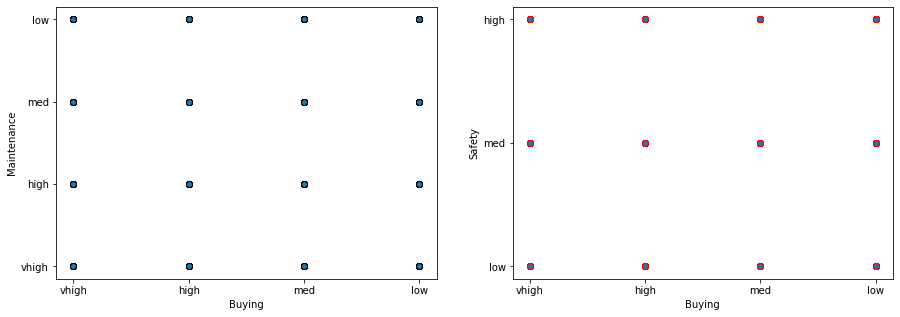

In [7]:
import matplotlib.pyplot as plt # library for plotting
# line required for inline charts/plots
%matplotlib inline
# library for evaluation metrics
from sklearn import metrics
# library for sampling the data sets
from sklearn.model_selection import train_test_split
# size the figure to fit 2 figures on the same line

plt.figure(3,figsize=(15,5))

# subplot 1
plt.subplot(1,2,1)

# scatter plot 1
plt.scatter(x=data.iloc[:,0],y=data.iloc[:,1] ,edgecolor='k')
plt.xlabel('Buying')
plt.ylabel('Maintenance')

# subplot 1
plt.subplot(1,2,2)

# scatter plot 2
plt.scatter(x=data.iloc[:,1],y=data.iloc[:,5] ,edgecolor='r')
plt.xlabel('Buying')
plt.ylabel('Safety')



Text(0, 0.5, 'luggage boot')

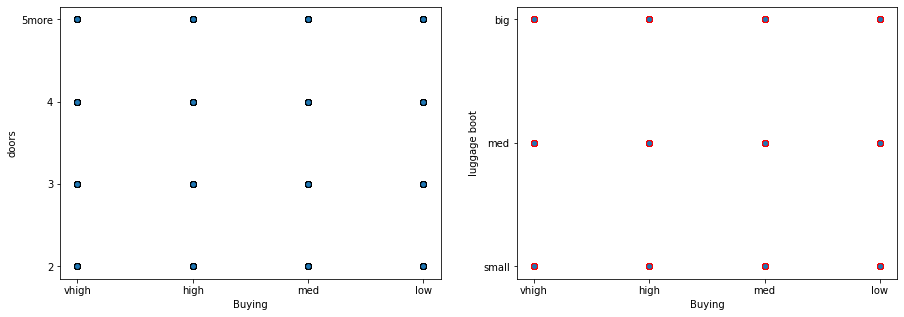

In [8]:
# size the figure to fit 2 figures on the same line
plt.figure(3,figsize=(15,5))

# subplot 1
plt.subplot(1,2,1)

# scatter plot 1
plt.scatter(x=data.iloc[:,0],y=data.iloc[:,2] ,edgecolor='k')
plt.xlabel('Buying')
plt.ylabel('doors')

# subplot 1
plt.subplot(1,2,2)

# scatter plot 2
plt.scatter(x=data.iloc[:,0],y=data.iloc[:,4] ,edgecolor='r')
plt.xlabel('Buying')
plt.ylabel('luggage boot')

- attributes don't show any correlations between each others, all attributes will be used to train the module

<AxesSubplot:xlabel='class', ylabel='count'>

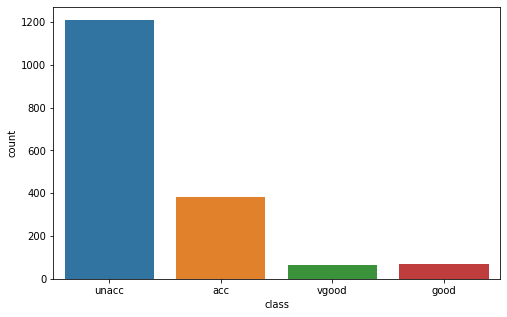

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
# count rows of each classes
sns.countplot(x="class", data=data)

In [10]:
# Convert categorical variable to numeric
cleanup_nums = {"buying": {"low": 1, "med": 2, "high": 3, "vhigh": 4},
                "maintenance": {"low": 1, "med": 2, "high": 3, "vhigh": 4 },
                "doors": {"2": 2,"2": 2,"3": 3, "4": 4, "5more": 5 },
                "persons": {"2": 2, "4": 4, "more": 5 },
                "luggage boot": {"small": 1, "med": 2, "big": 3 },
                "safety": {"low": 1, "med": 2, "high": 3 }}

data.replace(cleanup_nums, inplace=True)
data.head(10)

,buying,maintenance,doors,persons,luggage boot,safety,class
0,4,4,2,2,1,1,unacc
1,4,4,2,2,1,2,unacc
2,4,4,2,2,1,3,unacc
3,4,4,2,2,2,1,unacc
4,4,4,2,2,2,2,unacc
5,4,4,2,2,2,3,unacc
6,4,4,2,2,3,1,unacc
7,4,4,2,2,3,2,unacc
8,4,4,2,2,3,3,unacc
9,4,4,2,4,1,1,unacc


In [11]:
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

# For this example, we use buying,maintenance,doors,persons,luggage boot and safety attributes 
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

print(x.shape)
print(y.shape)

# default is 75% / 25% train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

(1728, 6)
(1728, 1)


In [12]:
       
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x_train,y_train)
sc.fit(x_test,y_test)

print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
      buying  maintenance  doors  persons  luggage boot  safety
1318       1            4      2        5             2       2
124        4            3      2        4             3       2
648        3            2      2        2             1       1
249        4            2      3        2             3       1
1599       1            2      5        2             3       1
...      ...          ...    ...      ...           ...     ...
906        2            4      3        4             3       1
309        4            2      5        4             2       1
838        3            1      5        2             1       2
1076       2            3      5        5             2       3
1453       1            3      3        5             2       2

[519 rows x 6 columns]
-------- x axis train ---------
      buying  maintenance  doors  persons  luggage boot  safety
580        3            3      3        4             2       2
1214       2    

The optimal number of neighbors is 7
The optimal score is 0.96


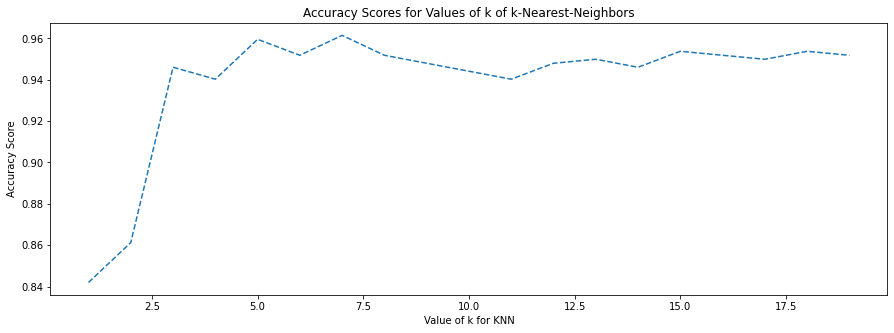

In [13]:
# import KNN model as 'KNeighborsClassifier'
from sklearn.neighbors import KNeighborsClassifier
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k)
 # input the train data to train KNN
 knn.fit(x_train,y_train.values.ravel())
 # see KNN prediction by inputting the test data
 y_pred=knn.predict(x_test)
 # append the performance metric (accuracy)
 scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

The optimal number of neighbors is 6
The optimal score is 0.96


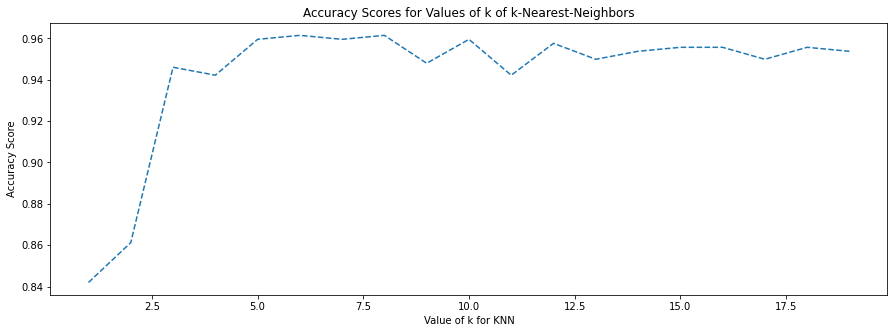

In [14]:
# empty variable for storing the KNN metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
# input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
# input the train data to train KNN
    knn.fit(x_train,y_train.values.ravel())
# see KNN prediction by inputting the test data
    y_pred=knn.predict(x_test)
# append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    optimal_k = lrange[scores.index(max(scores))]
    
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

              precision    recall  f1-score   support

         acc       0.90      0.91      0.91       115
        good       0.90      0.72      0.80        25
       unacc       0.98      0.99      0.99       363
       vgood       0.85      0.69      0.76        16

    accuracy                           0.95       519
   macro avg       0.91      0.83      0.86       519
weighted avg       0.95      0.95      0.95       519

The Cross valadtion score is:  0.9396145536847159


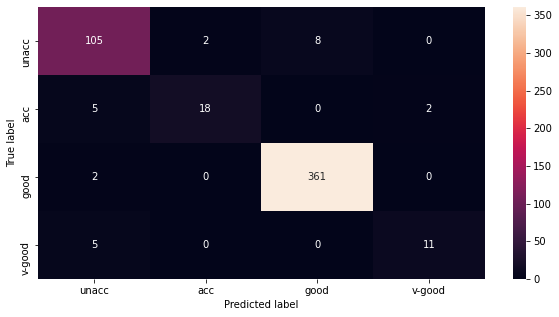

In [16]:
# Import the DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['unacc','acc','good','v-good'],
columns = ['unacc','acc','good','v-good'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test,y_pred,labels=np.unique(y_pred)))
score = cross_val_score(knn, x_train, y_train.values.ravel(), cv=5, scoring='accuracy')
print("The Cross valadtion score is: ",score.mean())

The optimal number of neighbors is 12
The optimal score is 0.96


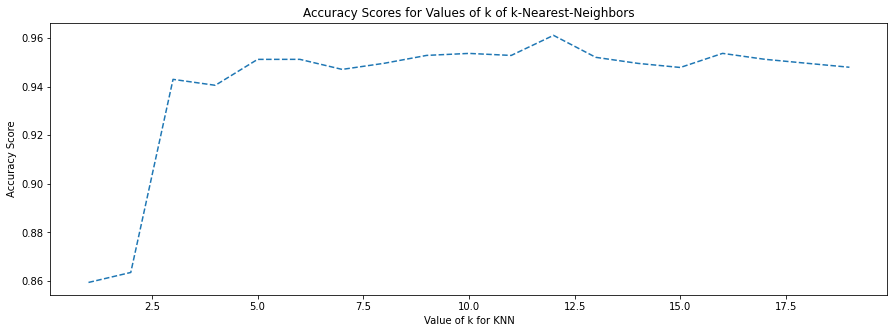

In [17]:
# import library for cross validation scoring
from sklearn.model_selection import cross_val_score

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))

# loop the KNN process
for k in lrange:    
# input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
# get score for the 10 fold cross validation
    score = cross_val_score(knn, x_train, y_train.values.ravel(), cv=20, scoring='accuracy')
    scores.append(score.mean())
    optimal_k = lrange[scores.index(max(scores))]
    
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

plt.figure(2,figsize=(15,5))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

- Using KNN with default configuration shows that k= 7 is the most optimized for higher model accuracy.
- Using KNN with custom configuration shows that k= 6 is the most optimized for higher model accuracy, which is lower than default configuration.
- Using cross validation shows that k = 12 is most optimized for higher model accuracy, which is higher than the two other methods
- Using cross validation doesn’t affect the accuracy of the model.
